# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Task 1
### 10 Countries with the Most Projects

In [8]:
# Load as Pandas dataframe
df1 = pd.read_json('data/world_bank_projects.json')

# Count top 10 unique values, by country, and sort in descending order
df1.groupby('countryname').count().sort_values(by='id',ascending=False).head(10)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryshortname,docty,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
countryname,,,,,,,,,,,,,,,,,,,,,
People's Republic of China,19,19,19,19,19,16,19,19,19,19,...,19,19,19,19,19,17,17,19,19,19
Republic of Indonesia,19,19,19,19,19,15,19,19,19,14,...,19,19,19,19,19,19,19,19,19,19
Socialist Republic of Vietnam,17,17,17,17,17,14,17,17,17,16,...,17,17,17,16,17,17,17,17,17,17
Republic of India,16,16,16,16,15,13,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Republic of Yemen,13,13,13,13,13,8,13,13,13,11,...,13,13,13,13,13,13,13,13,13,13
People's Republic of Bangladesh,12,12,12,12,12,10,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Nepal,12,12,12,12,11,7,12,12,12,12,...,12,12,12,12,12,11,11,12,12,12
Kingdom of Morocco,12,12,12,12,12,11,12,12,12,10,...,12,12,12,12,12,11,11,12,12,12
Republic of Mozambique,11,11,11,11,11,9,11,11,11,10,...,11,11,11,11,11,11,11,11,11,11


Text(0.5,0,'Number of Projects')

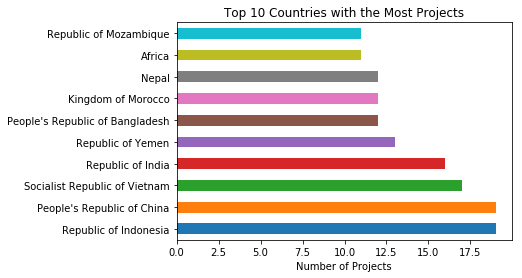

In [9]:
# Visualize results with bar chart
series1 = df1['countryname'].value_counts().head(10)
series1.plot(kind='barh',title='Top 10 Countries with the Most Projects')
plt.xlabel('Number of Projects')

## Task 2
### Top 10 Major Project Themes, Grouped by Code

In [10]:
# Load as JSON string
json_str = json.load(open('data/world_bank_projects.json'))

# Normalize data on 'mjtheme_namecode' 
df2 = json_normalize(json_str,'mjtheme_namecode')

# Rank top 10 major project themes, by code
df2.groupby('code').count().sort_values(by='name',ascending=False).head(10)

,name
code,
11,250
10,216
8,210
2,199
6,168
4,146
7,130
5,77
9,50


Text(0,0.5,'Count')

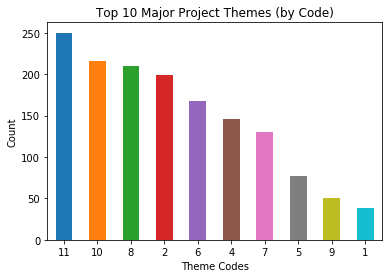

In [135]:
# Visualize results
series2 = df2['code'].value_counts().head(10)
series2.plot(kind='bar',title='Top 10 Major Project Themes (by Code)',rot=0)
plt.xlabel('Theme Codes')
plt.ylabel('Count')

## Task 3
### Top 10 Major Project Themes, Grouped by Project Name

In [11]:
# Load as JSON string
json_str = json.load(open('data/world_bank_projects.json'))

# Normalize data on 'mjtheme_namecode' 
df3 = json_normalize(json_str,'mjtheme_namecode')

# Replace empty values in 'name' column with None
df3.loc[df3['name']=='','name']=None

# Fill None values in 'name' column w/ corresponding theme name from 'code'
df3 = df3.sort_values(['code','name']).ffill()

# Rank top 10 major project themes, by name
df3.groupby('name').count().sort_values(by='code',ascending=False).head(10)

,code
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


Text(0.5,0,'Count')

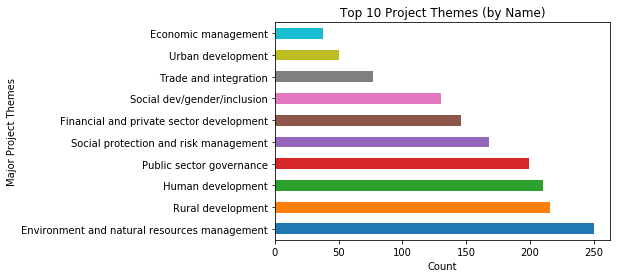

In [12]:
# Visualize results
series3 = df3['name'].value_counts().head(10)
series3.plot(kind='barh',title='Top 10 Project Themes (by Name)')
plt.ylabel('Major Project Themes')
plt.xlabel('Count')